In [2]:
import pandas as pd
import numpy as np
import json
import datetime
import re #Expresiones regulares
import emoji 
import demoji 
import seaborn as sns
import matplotlib.pyplot as plt

# EDA: California

# Lecura de los archivos 

In [3]:
df1_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/1.json', lines=True)
df2_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/2.json', lines=True)
df3_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/3.json', lines=True)
df4_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/4.json', lines=True)
df5_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/5.json', lines=True)
df6_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/6.json', lines=True)
df7_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/7.json', lines=True)
df8_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/8.json', lines=True)
df9_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/9.json', lines=True)
df10_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/10.json', lines=True)
df11_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/11.json', lines=True)
df12_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/12.json', lines=True)
df13_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/13.json', lines=True)
df14_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/14.json', lines=True)
df15_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/15.json', lines=True)
df16_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/16.json', lines=True)
df17_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/17.json', lines=True)
df18_ny = pd.read_json('../Archivos_originales/reviews-estados/review-California/18.json', lines=True)


dataframes = [df1_ny, df2_ny, df3_ny, df4_ny, df5_ny, 
                         df6_ny, df7_ny, df8_ny, df9_ny, df10_ny, 
                         df11_ny,df12_ny,df13_ny,df14_ny,df15_ny,df16_ny,df17_ny,df18_ny]

C:\Users\Jocelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\Jocelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\Jocelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\Jocelyn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid val

In [4]:
df = pd.concat(dataframes, ignore_index=True)
df

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.089912e+20,Song Ro,1609909927056,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
1,1.112903e+20,Rafa Robles,1612849648663,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
2,1.126404e+20,David Han,1583643882296,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
3,1.174403e+20,Anthony Kim,1551938216355,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
4,1.005808e+20,Mario Marzouk,1494910901933,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49
...,...,...,...,...,...,...,...,...
2699995,1.139124e+20,Mayur Senjalia,1553382802382,5,None,None,None,0x808fc0c19ba4e761:0x589c9ad71c62a420
2699996,1.180461e+20,Dennis Barrios,1509453169393,5,None,None,None,0x808fc0c19ba4e761:0x589c9ad71c62a420
2699997,1.071072e+20,gena807,1614453586811,4,None,None,None,0x808fc0c19ba4e761:0x589c9ad71c62a420
2699998,1.172404e+20,Anant Khadke,1569739943903,5,None,None,None,0x808fc0c19ba4e761:0x589c9ad71c62a420


# Verificación de nulos

In [6]:
df.isnull().sum()

user_id          0
name             0
time             0
rating           0
text       1170964
pics       2600710
resp       2454831
gmap_id          0
dtype: int64

# Tipo de dato de c/columna

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 8 columns):
 #   Column   Dtype  
---  ------   -----  
 0   user_id  float64
 1   name     object 
 2   time     int64  
 3   rating   int64  
 4   text     object 
 5   pics     object 
 6   resp     object 
 7   gmap_id  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 146.5+ MB


# Número de reviews a través del tiempo

In [7]:
df['time'] = df['time'].apply(lambda x: pd.to_datetime(x, unit='ms'))
df['anio'] = df['time'].dt.year
df['mes'] = df['time'].dt.month
df = df.drop(['time'],axis=1)
df

,user_id,name,rating,text,pics,resp,gmap_id,anio,mes
0,1.089912e+20,Song Ro,5,Love there korean rice cake.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021,1
1,1.112903e+20,Rafa Robles,5,Good very good,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021,2
2,1.126404e+20,David Han,4,They make Korean traditional food very properly.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2020,3
3,1.174403e+20,Anthony Kim,5,Short ribs are very delicious.,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2019,3
4,1.005808e+20,Mario Marzouk,5,Great food and prices the portions are large,None,None,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2017,5
...,...,...,...,...,...,...,...,...,...
2699995,1.139124e+20,Mayur Senjalia,5,None,None,None,0x808fc0c19ba4e761:0x589c9ad71c62a420,2019,3
2699996,1.180461e+20,Dennis Barrios,5,None,None,None,0x808fc0c19ba4e761:0x589c9ad71c62a420,2017,10
2699997,1.071072e+20,gena807,4,None,None,None,0x808fc0c19ba4e761:0x589c9ad71c62a420,2021,2
2699998,1.172404e+20,Anant Khadke,5,None,None,None,0x808fc0c19ba4e761:0x589c9ad71c62a420,2019,9


In [46]:
df.columns

Index(['user_id', 'name', 'rating', 'text', 'pics', 'resp', 'gmap_id', 'anio',
       'mes'],
      dtype='object')

In [8]:
y=pd.DataFrame(df.groupby('anio').count())
y= y.sort_values(by='anio', ascending=False)
y=y[['gmap_id','text','user_id']]
y


,gmap_id,text,user_id
anio,,,
2021,301238,177630,301238
2020,486540,272993,486540
2019,771747,412799,771747
2018,610549,335492,610549
2017,352864,208701,352864
2016,121301,81214,121301
2015,26800,19622,26800
2014,10603,8556,10603
2013,7505,5958,7505


Grafica

+ Número de negocios a los que se les dejó una reseña por año
+ Número de reseñas por año

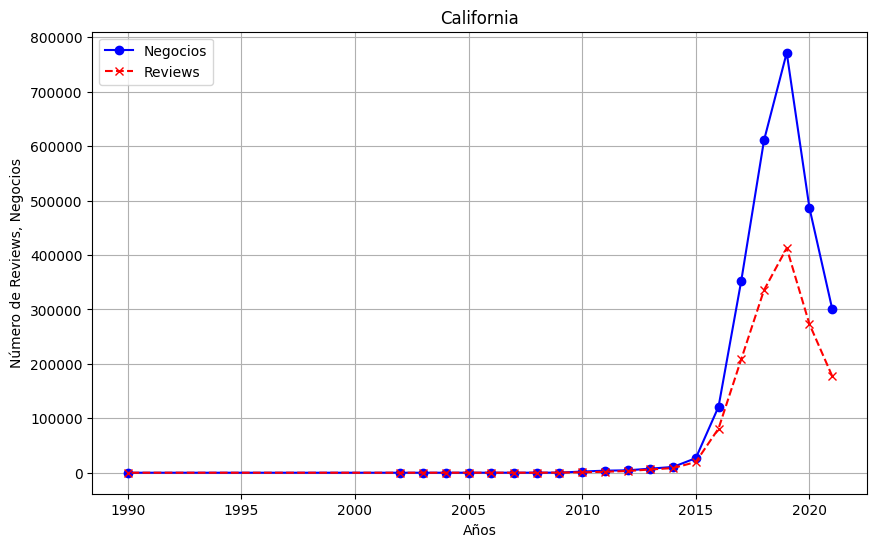

In [9]:
gmap_id = y['gmap_id']
text = y['text']

plt.figure(figsize=(10, 6)) 
plt.plot(gmap_id, label='Negocios', marker='o', linestyle='-', color='b')
plt.plot(text, label='Reviews', marker='x', linestyle='--', color='r')
plt.title('California')
plt.xlabel('Años')
plt.ylabel('Número de Reviews, Negocios')
plt.grid(True)  
plt.legend()
plt.show()


# Máximos y Mínimos para las variables numéricas

Columna: Rating 

In [12]:
print('Máximo rating', df.rating.max())
print('Mínimo rating', df.rating.min())


Máximo rating 5
Mínimo rating 1


# Correlación entre variables

Matriz de correlación


In [43]:
correlation_matrix = y.corr()

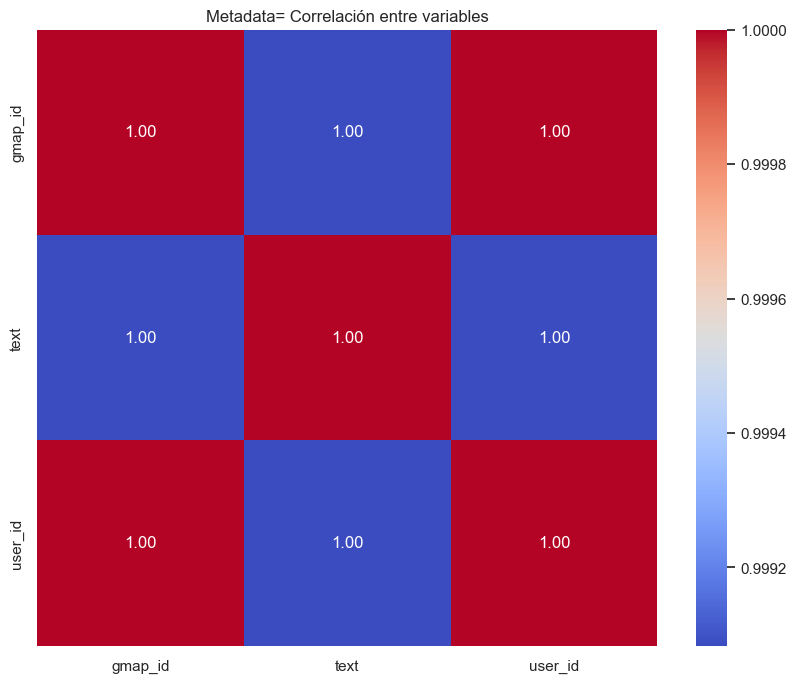

In [44]:
sns.set(style="white") 
plt.figure(figsize=(10, 8))  

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Metadata= Correlación entre variables")
plt.show()


# Verificación de Duplicados

Selección de columnas con las que se va a trabajar

In [10]:
df2=df[['user_id', 'name', 'rating', 'text','gmap_id', 'anio',
       'mes']]

In [11]:
df2.duplicated().sum()

75245

Visualizar los registros que están duplicados

In [49]:
df2[df2.duplicated(keep='first')]

,user_id,name,rating,text,gmap_id,anio,mes
144,1.065449e+20,Cynthia Mesa-Toney,5,What a wonderful place to hang out on a Friday...,0x8747210b0fb24ff3:0x73eeb5f3e84ea92e,2020,11
167,1.126359e+20,Leo Martinez,3,Still trying to understand how the company runs.,0x876b86d87b9f254f:0x9c70d047a9e3fc73,2021,3
170,1.112176e+20,Lauren Bruns,1,I would leave no stars if I could but you have...,0x876b86d87b9f254f:0x9c70d047a9e3fc73,2019,2
171,1.105342e+20,kaydee valentino,1,Advertising a customer service position but th...,0x876b86d87b9f254f:0x9c70d047a9e3fc73,2020,3
345,1.108135e+20,IGS,4,"Pretty good local pizza, but nobody can seem t...",0x87396f9ac74fd78d:0x299d31c8c09e111d,2021,8
...,...,...,...,...,...,...,...
1013258,1.146660e+20,deborah perry,5,By far the best tea house in Fort Collins. I l...,0x876eb35194c084af:0x52f6cb33a935de92,2017,1
1013260,1.029112e+20,Ella Luce,5,"A very soothing and calm place to escape to, f...",0x876eb35194c084af:0x52f6cb33a935de92,2018,11
1013506,1.022486e+20,Gigi Solo,1,I have to give this place a one star due to th...,0x407016b1b5f29143:0x4d1b302f5df62f16,2019,12
1013537,1.183422e+20,Joshua Sanders,5,Scrumptious,0x407016b1b5f29143:0x4d1b302f5df62f16,2020,1


# Se cuenta el número de reviews por local

In [50]:
reviews_local=df.groupby(by=['gmap_id']).count()
reviews_local

,user_id,name,rating,text,pics,resp,anio,mes
gmap_id,,,,,,,,
0x40658756e37ad7dd:0x6dc7d98a58aa4aff,125,125,125,68,1,0,125,125
0x406587650a993765:0x3eba3c9b4272d3a2,22,22,22,14,0,0,22,22
0x406587656d14c2ff:0xafcacfa32a01cdbc,54,54,54,34,2,46,54,54
0x40658765c667101f:0x3e41c14c836311e4,16,16,16,12,1,8,16,16
0x40658796cf6ac065:0xe7a87cf2c106742f,11,11,11,7,0,0,11,11
...,...,...,...,...,...,...,...,...
0x89c8082326077f95:0x32e1a16e6f5ab919,68,68,68,30,1,0,68,68
0x89c80fac93ec964b:0x2c77f26e4591be32,33,33,33,17,1,0,33,33
0x89d87c441a8ed003:0xe046f0c2dd6645fd,117,117,117,75,0,0,117,117
